In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())

# Outline
Here we will look at each team's passing lane distribution in each match, and try to cluster them into passing profiles using K-means

In [2]:
df = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info.pkl.gz'))
df = df.unstack(level=['p1', 'p2']).droplevel(0, axis=1)
df.index = df.index.rename(['matchId', 'teamId'])
df.columns = df.columns.rename(['OriginZone', 'DestinationZone'])
df = df.fillna(0)
df

OriginZone              0                                                    \
DestinationZone         1         2         3         4         5         6   
matchId teamId                                                                
2499719 1609     0.062189  0.009950  0.057214  0.012438  0.004975  0.004975   
        1631     0.042857  0.007143  0.085714  0.014286  0.014286  0.007143   
2499720 1625     0.017094  0.014957  0.021368  0.008547  0.004274  0.000000   
        1651     0.067797  0.008475  0.093220  0.016949  0.000000  0.016949   
2499721 1610     0.070796  0.023599  0.056047  0.038348  0.008850  0.000000   
...                   ...       ...       ...       ...       ...       ...   
2576336 3315     0.042553  0.005319  0.063830  0.015957  0.000000  0.005319   
2576337 3164     0.056140  0.003509  0.059649  0.003509  0.003509  0.007018   
        3204     0.046632  0.000000  0.046632  0.005181  0.000000  0.015544   
2576338 3185     0.140704  0.010050  0.090452  0.000000  0.000000  0.010050   
        3193     0.059028  0.000000  0.038194  0.010417  0.000000  0.003472   

OriginZone              1                                ...         6  \
DestinationZone         2         3         4         5  ...         7   
matchId teamId                                           ...             
2499719 1609     0.029851  0.017413  0.034826  0.029851  ...  0.044776   
        1631     0.007143  0.028571  0.078571  0.028571  ...  0.021429   
2499720 1625     0.019231  0.010684  0.027778  0.019231  ...  0.055556   
        1651     0.084746  0.050847  0.042373  0.067797  ...  0.008475   
2499721 1610     0.061947  0.026549  0.047198  0.023599  ...  0.091445   
...                   ...       ...       ...       ...  ...       ...   
2576336 3315     0.106383  0.026596  0.021277  0.069149  ...  0.074468   
2576337 3164     0.063158  0.031579  0.066667  0.031579  ...  0.045614   
        3204     0.082902  0.067358  0.025907  0.031088  ...  0.056995   
2576338 3185     0.105528  0.040201  0.015075  0.030151  ...  0.050251   
        3193     0.031250  0.024306  0.052083  0.034722  ...  0.118056   

OriginZone                        7         0         2         1         2  \
DestinationZone         8         8         7         3         8         6   
matchId teamId                                                                
2499719 1609     0.007463  0.069652  0.000000  0.000000  0.000000  0.000000   
        1631     0.021429  0.071429  0.007143  0.007143  0.000000  0.000000   
2499720 1625     0.012821  0.034188  0.000000  0.006410  0.000000  0.000000   
        1651     0.000000  0.016949  0.008475  0.000000  0.008475  0.008475   
2499721 1610     0.014749  0.053097  0.002950  0.008850  0.005900  0.000000   
...                   ...       ...       ...       ...       ...       ...   
2576336 3315     0.037234  0.058511  0.000000  0.010638  0.005319  0.005319   
2576337 3164     0.007018  0.035088  0.000000  0.003509  0.000000  0.000000   
        3204     0.015544  0.036269  0.005181  0.010363  0.005181  0.005181   
2576338 3185     0.005025  0.045226  0.005025  0.005025  0.000000  0.005025   
        3193     0.020833  0.065972  0.000000  0.000000  0.000000  0.000000   

OriginZone             0         1         2  
DestinationZone        8         7         7  
matchId teamId                                
2499719 1609     0.00000  0.000000  0.000000  
        1631     0.00000  0.000000  0.000000  
2499720 1625     0.00000  0.000000  0.000000  
        1651     0.00000  0.000000  0.000000  
2499721 1610     0.00295  0.011799  0.000000  
...                  ...       ...       ...  
2576336 3315     0.00000  0.005319  0.005319  
2576337 3164     0.00000  0.000000  0.000000  
        3204     0.00000  0.000000  0.005181  
2576338 3185     0.00000  0.010050  0.000000  
        3193     0.00000  0.000000  0.000000  

[3652 rows x 36 columns]

### K-Means

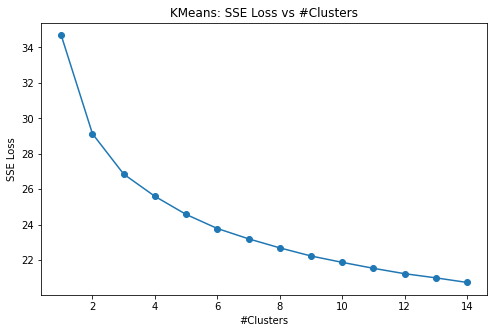

In [3]:
plt.figure(figsize=(8, 5))
plt.plot([i for i in range(1,15)],
         [KMeans(n_clusters=i, random_state=0).fit(df).inertia_ for i in range(1,15)], 'o-')

plt.title('KMeans: SSE Loss vs #Clusters')
plt.xlabel('#Clusters')
plt.ylabel('SSE Loss')
plt.savefig('../figures/passing_lane_k_means/elbow_curve.png', bbox_inches='tight')
plt.show()


**Elbow:** 2

In [4]:
kmeans_classifier = KMeans(n_clusters=2, random_state=0).fit(df)
df['cluster'] = kmeans_classifier.labels_
df.to_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_clustered.pkl.gz'))
df.to_csv(os.path.join(ROOT, 'intermediates', 'zone_lane_info_clustered.csv'))
df

OriginZone              0                                                    \
DestinationZone         1         2         3         4         5         6   
matchId teamId                                                                
2499719 1609     0.062189  0.009950  0.057214  0.012438  0.004975  0.004975   
        1631     0.042857  0.007143  0.085714  0.014286  0.014286  0.007143   
2499720 1625     0.017094  0.014957  0.021368  0.008547  0.004274  0.000000   
        1651     0.067797  0.008475  0.093220  0.016949  0.000000  0.016949   
2499721 1610     0.070796  0.023599  0.056047  0.038348  0.008850  0.000000   
...                   ...       ...       ...       ...       ...       ...   
2576336 3315     0.042553  0.005319  0.063830  0.015957  0.000000  0.005319   
2576337 3164     0.056140  0.003509  0.059649  0.003509  0.003509  0.007018   
        3204     0.046632  0.000000  0.046632  0.005181  0.000000  0.015544   
2576338 3185     0.140704  0.010050  0.090452  0.000000  0.000000  0.010050   
        3193     0.059028  0.000000  0.038194  0.010417  0.000000  0.003472   

OriginZone              1                                ...         6  \
DestinationZone         2         3         4         5  ...         8   
matchId teamId                                           ...             
2499719 1609     0.029851  0.017413  0.034826  0.029851  ...  0.007463   
        1631     0.007143  0.028571  0.078571  0.028571  ...  0.021429   
2499720 1625     0.019231  0.010684  0.027778  0.019231  ...  0.012821   
        1651     0.084746  0.050847  0.042373  0.067797  ...  0.000000   
2499721 1610     0.061947  0.026549  0.047198  0.023599  ...  0.014749   
...                   ...       ...       ...       ...  ...       ...   
2576336 3315     0.106383  0.026596  0.021277  0.069149  ...  0.037234   
2576337 3164     0.063158  0.031579  0.066667  0.031579  ...  0.007018   
        3204     0.082902  0.067358  0.025907  0.031088  ...  0.015544   
2576338 3185     0.105528  0.040201  0.015075  0.030151  ...  0.005025   
        3193     0.031250  0.024306  0.052083  0.034722  ...  0.020833   

OriginZone              7         0         2         1         2        0  \
DestinationZone         8         7         3         8         6        8   
matchId teamId                                                               
2499719 1609     0.069652  0.000000  0.000000  0.000000  0.000000  0.00000   
        1631     0.071429  0.007143  0.007143  0.000000  0.000000  0.00000   
2499720 1625     0.034188  0.000000  0.006410  0.000000  0.000000  0.00000   
        1651     0.016949  0.008475  0.000000  0.008475  0.008475  0.00000   
2499721 1610     0.053097  0.002950  0.008850  0.005900  0.000000  0.00295   
...                   ...       ...       ...       ...       ...      ...   
2576336 3315     0.058511  0.000000  0.010638  0.005319  0.005319  0.00000   
2576337 3164     0.035088  0.000000  0.003509  0.000000  0.000000  0.00000   
        3204     0.036269  0.005181  0.010363  0.005181  0.005181  0.00000   
2576338 3185     0.045226  0.005025  0.005025  0.000000  0.005025  0.00000   
        3193     0.065972  0.000000  0.000000  0.000000  0.000000  0.00000   

OriginZone              1         2 cluster  
DestinationZone         7         7          
matchId teamId                               
2499719 1609     0.000000  0.000000       1  
        1631     0.000000  0.000000       0  
2499720 1625     0.000000  0.000000       1  
        1651     0.000000  0.000000       0  
2499721 1610     0.011799  0.000000       0  
...                   ...       ...     ...  
2576336 3315     0.005319  0.005319       0  
2576337 3164     0.000000  0.000000       1  
        3204     0.000000  0.005181       1  
2576338 3185     0.010050  0.000000       0  
        3193     0.000000  0.000000       1  

[3652 rows x 37 columns]

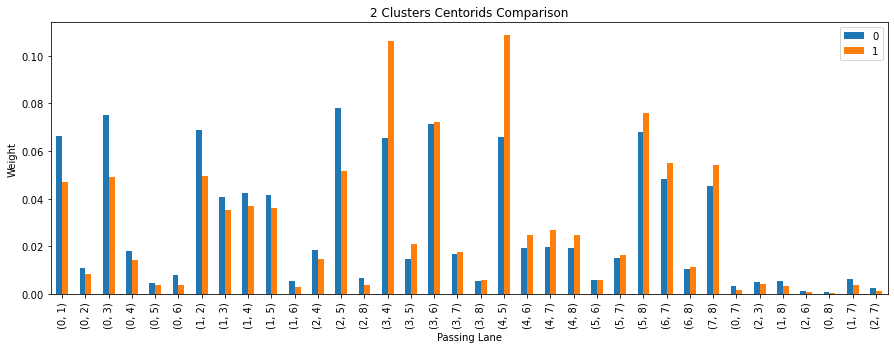

In [5]:
cluster_centers = pd.DataFrame(kmeans_classifier.cluster_centers_).iloc[:, :].T
cluster_centers.index = df.columns[:-1]
cluster_centers.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Passing Lane')
plt.ylabel('Weight')
plt.title('2 Clusters Centorids Comparison')
plt.savefig('../figures/passing_lane_k_means/centroids_2_clusters.png', bbox_inches='tight')
plt.show()

In [6]:
cluster_centers.to_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_cluster_centers.pkl.gz'))
cluster_centers.to_csv(os.path.join(ROOT, 'intermediates', 'zone_lane_info_cluster_centers.csv'))

In [7]:
matches = pd.read_pickle(os.path.join(ROOT, 'processed_data', 'matches_df.pkl.gz'))
matches = matches.droplevel('nation').set_index(['team_home', 'team_away'], append=True)

matches_formatted = dict()
for i, row in matches.iterrows():
    matches_formatted[i[0]] = dict()
    matches_formatted[i[0]][i[1]] = row['goals_home']
    matches_formatted[i[0]][i[2]] = row['goals_away']


In [8]:
matches_formatted = pd.DataFrame.from_dict({(i,j): matches_formatted[i][j]
                           for i in matches_formatted.keys() 
                           for j in matches_formatted[i].keys()},
                       orient='index')
matches_formatted.index = pd.MultiIndex.from_tuples(matches_formatted.index)
matches_formatted.columns = ['goals']


In [9]:
for i, row in matches_formatted.iterrows():
    matches_formatted.loc[i, 'win'] = int(row['goals']>matches_formatted.loc[i[0], 'goals'].min())

In [10]:
matches_formatted.to_pickle(os.path.join(ROOT, 'intermediates', 'matches_goals_wins.pkl.gz'))
matches_formatted.to_csv(os.path.join(ROOT, 'intermediates', 'matches_goals_wins.csv'))
matches_formatted.head(5)

goals  win
2499719 1609      4  1.0
        1631      3  0.0
2499720 1651      0  0.0
        1625      2  1.0
2499721 1610      2  0.0

# To Do: Find Correlation with Num goals and correlation with winning of the cluster assignments

goals  win  cluster
2499719 1609      4  1.0        1
        1631      3  0.0        0
2499720 1625      2  1.0        1
        1651      0  0.0        0
2499721 1610      2  0.0        0
...             ...  ...      ...
2576336 3315      0  0.0        0
2576337 3164      1  0.0        1
        3204      3  1.0        1
2576338 3185      2  1.0        0
        3193      1  0.0        1

[3652 rows x 3 columns]

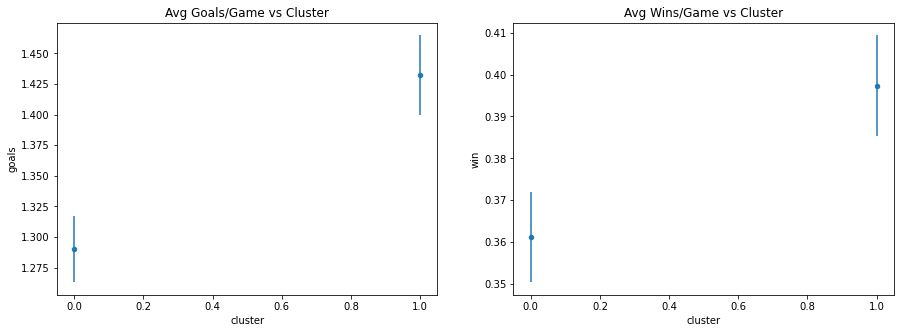

In [11]:
tmp = pd.concat([matches_formatted, df.iloc[:, -1]], axis=1)
tmp.columns = ['goals', 'win', 'cluster']

mean = tmp.groupby(tmp['cluster']).mean()
errors = tmp.groupby(tmp['cluster']).sem()
display(tmp)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
mean.reset_index().plot(kind='scatter', x='cluster', y='goals', yerr=errors[['goals']], ax=axes[0], title='Avg Goals/Game vs Cluster')
mean.reset_index().plot(kind='scatter', x='cluster', y='win', yerr=errors[['win']], ax=axes[1], title='Avg Wins/Game vs Cluster')
plt.savefig('../figures/passing_lane_k_means/cluster_performance_high_level', bbox_inches='tight')
plt.show()


### How does the mean cluster assignment correlate with end of season perfromance

In [12]:
tmp = df[['cluster']].droplevel(0).sort_index().mean(level=0)
tmp.columns = ['mean_cluster']
performance = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'team_performance.pkl.gz'))
tmp = pd.concat([tmp, performance], axis=1)
tmp

,mean_cluster,name,city,area.name,avg_pass_per_game,avg_shots_per_game,avg_goals_per_game,end_of_season_pts
674,0.736842,Valencia,Valencia,Spain,413.789474,11.000000,1.421053,73
675,0.710526,Real Madrid,Madrid,Spain,581.078947,16.605263,2.131579,76
676,0.763158,Barcelona,Barcelona,Spain,612.105263,13.210526,2.289474,93
677,0.473684,Deportivo La Coru\u00f1a,A Coru\u00f1a,Spain,382.605263,10.657895,0.921053,29
678,0.552632,Athletic Club,Bilbao,Spain,395.315789,9.921053,0.842105,43
...,...,...,...,...,...,...,...,...
3795,0.210526,Troyes,Troyes,France,360.605263,8.578947,0.710526,33
3799,0.315789,Angers,Angers,France,379.105263,10.736842,0.947368,43
3804,0.368421,Dijon,Dijon,France,390.131579,10.368421,1.236842,46
10531,0.263158,Swansea City,Swansea,England,390.578947,8.000000,0.684211,33


<Figure size 1080x360 with 0 Axes>

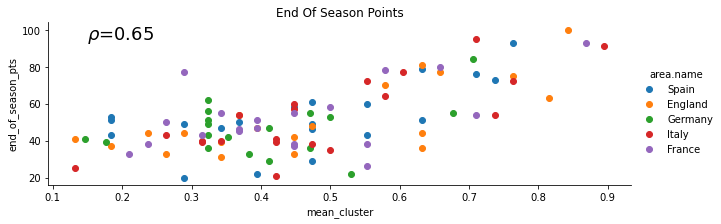

In [13]:
import seaborn
from matplotlib import pyplot 
#from ggplot import *

plt.figure(figsize=(15, 5))
fg = seaborn.FacetGrid(data=tmp, hue='area.name', hue_order=tmp['area.name'].unique(), aspect=3)
fg.map(pyplot.scatter, 'mean_cluster', 'end_of_season_pts').add_legend()
plt.title('End Of Season Points')
plt.text(0.15, 95,'$\\rho$=0.65', fontsize=18)
plt.savefig('../figures/passing_lane_k_means/cluster_performance_EOS_pts', bbox_inches='tight')

plt.show()



In [14]:
tmp[['mean_cluster', 'end_of_season_pts']].corr()

,mean_cluster,end_of_season_pts
mean_cluster,1.000000,0.647671
end_of_season_pts,0.647671,1.000000
